Day 01

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    validation_split=0.2  # 20% validation split
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='rgb' # Add this to ensure images are converted to RGB
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb' # Add this to ensure images are converted to RGB
)

Found 1928 images belonging to 8 classes.
Found 479 images belonging to 8 classes.


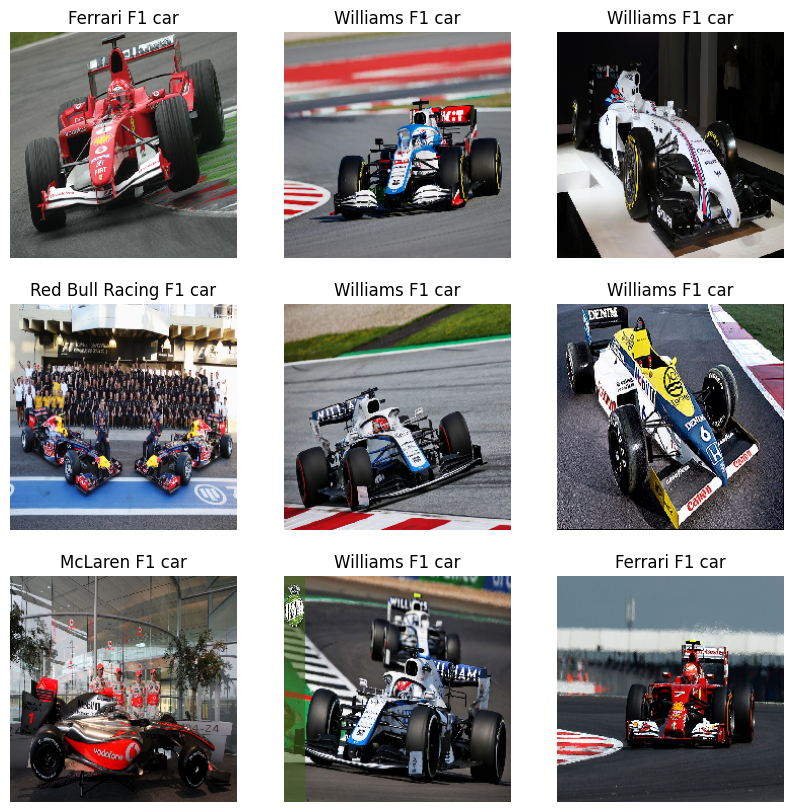

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = list(train_generator.class_indices.keys())

images, labels = next(train_generator)  # get a batch
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[np.argmax(labels[i])])
    plt.axis('off')
plt.show()


In [ ]:
print(f"Classes found: {train_generator.class_indices}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")


Classes found: {'AlphaTauri F1 car': 0, 'Ferrari F1 car': 1, 'McLaren F1 car': 2, 'Mercedes F1 car': 3, 'Racing Point F1 car': 4, 'Red Bull Racing F1 car': 5, 'Renault F1 car': 6, 'Williams F1 car': 7}
Number of training samples: 1928
Number of validation samples: 479


Day 02

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1928 images belonging to 8 classes.
Found 479 images belonging to 8 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = train_generator.num_classes
input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,728 (84.86 MB)

 Trainable params: 22,246,728 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from PIL import Image
import os

data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'

for root, dirs, files in os.walk(data_path):
    for fname in files:
        fpath = os.path.join(root, fname)
        try:
            img = Image.open(fpath)
            img.verify()  # verify if image file is broken
        except (IOError, SyntaxError) as e:
            print(f"Bad file detected: {fpath} - {e}")


In [ ]:
import os
from PIL import Image

# Path to your dataset folder
data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'

# Allowed image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

deleted_files = []

for root, dirs, files in os.walk(data_path):
    for fname in files:
        fpath = os.path.join(root, fname)
        ext = os.path.splitext(fname)[1].lower()

        # Remove files with invalid extensions
        if ext not in valid_extensions:
            os.remove(fpath)
            deleted_files.append(f"Removed non-image file: {fpath}")
            continue

        # Check if image is corrupted
        try:
            img = Image.open(fpath)
            img.verify()  # Verify image integrity
        except Exception as e:
            os.remove(fpath)
            deleted_files.append(f"Removed corrupted image: {fpath}")

print(f"Total files removed: {len(deleted_files)}")
for msg in deleted_files:
    print(msg)


Total files removed: 0


In [ ]:
epochs = 10  # start with 10, adjust as needed

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.1765 - loss: 3.0811 - val_accuracy: 0.3549 - val_loss: 1.6754
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.3839 - loss: 1.6410 - val_accuracy: 0.5052 - val_loss: 1.3269
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.5592 - loss: 1.2820 - val_accuracy: 0.6159 - val_loss: 1.1321
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.7010 - loss: 0.9136 - val_accuracy: 0.6347 - val_loss: 1.0342
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8039 - loss: 0.6301 - val_accuracy: 0.6305 - val_loss: 1.0738
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8715 - loss: 0.4415 - val_accuracy: 0.6472 - val_loss: 1.1694
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9035 - loss: 0.3329 - val_accuracy: 0.6242 - val_loss: 1.1216
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9334 - loss: 0.2337 - val_accuracy: 0.6326 - v

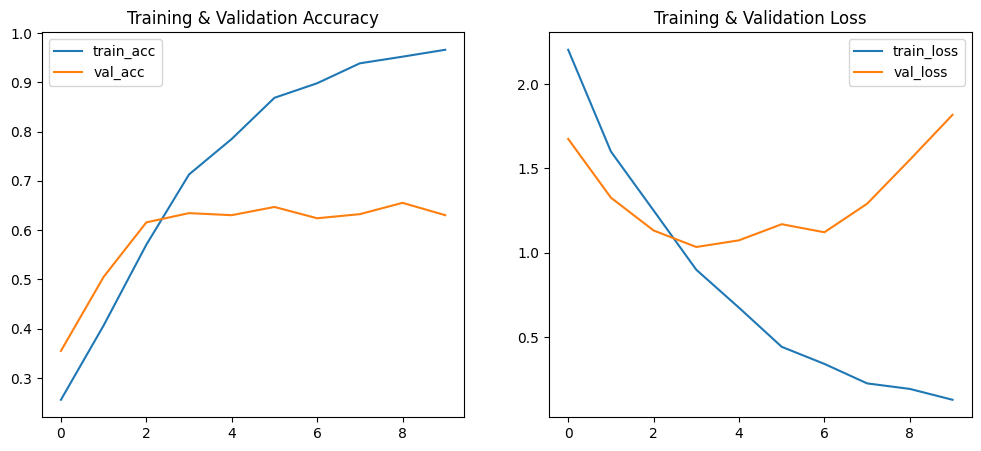

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/F1CarsDataset/f1cars_cnn_model.h5')


Day 03

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1928 images belonging to 8 classes.
Found 479 images belonging to 8 classes.


In [ ]:
import tensorflow as tf

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # freeze base layers initially

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │        10,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,268,232 (8.65 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.2357 - loss: 2.1375 - val_accuracy: 0.5470 - val_loss: 1.3578
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.5218 - loss: 1.3816 - val_accuracy: 0.6534 - val_loss: 1.0824
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6169 - loss: 1.1148 - val_accuracy: 0.6868 - val_loss: 0.9855
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.6483 - loss: 1.0352 - val_accuracy: 0.7182 - val_loss: 0.9042
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6942 - loss: 0.9081 - val_accuracy: 0.7077 - val_loss: 0.8869
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7059 - loss: 0.9053 - val_accuracy: 0.7349 - val_loss: 0.8641
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.7114 - loss: 0.8527 - val_accuracy: 0.7557 - val_loss: 0.7911
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.7465 - loss: 0.8075 - val_accuracy: 0.7182 - v

In [ ]:
model.save('/content/drive/MyDrive/F1CarsDataset/f1cars_mobilenetv2_augmented.h5')


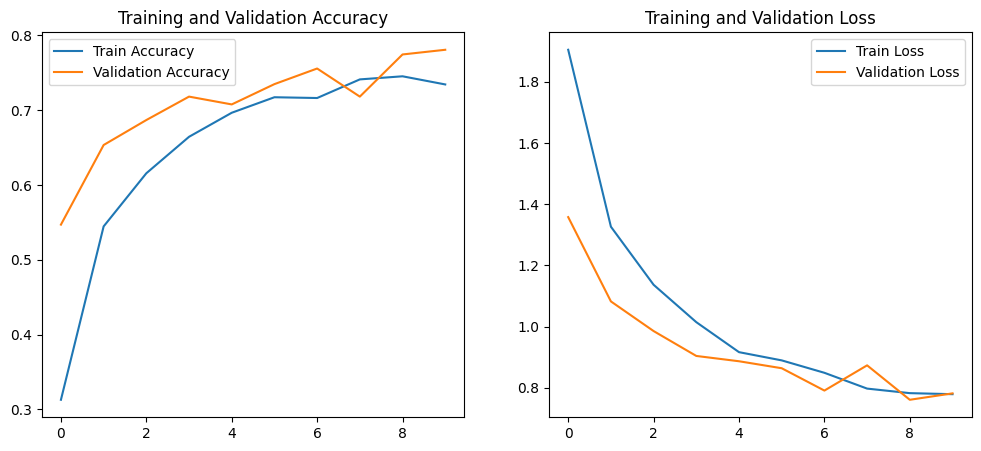

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy'] if 'history_fine' in globals() else history.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy'] if 'history_fine' in globals() else history.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss'] if 'history_fine' in globals() else history.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss'] if 'history_fine' in globals() else history.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Day 04

In [ ]:
import tensorflow as tf

model_path = '/content/drive/MyDrive/F1CarsDataset/f1cars_mobilenetv2_augmented.h5'  # Adjust path/filename
model = tf.keras.models.load_model(model_path)


In [ ]:
import numpy as np

# Reset the validation generator for consistent batch order
val_generator.reset()

# Predict probabilities for all validation images
pred_probs = model.predict(val_generator)

# Predicted class labels
pred_labels = np.argmax(pred_probs, axis=1)

# True class labels
true_labels = val_generator.classes

# Class label names
class_names = list(val_generator.class_indices.keys())


15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Validation Accuracy:", accuracy_score(true_labels, pred_labels))
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Validation Accuracy: 0.7807933194154488

Classification Report:

                        precision    recall  f1-score   support

     AlphaTauri F1 car       0.68      0.54      0.60        24
        Ferrari F1 car       0.82      0.93      0.87        73
        McLaren F1 car       0.91      0.56      0.69        73
       Mercedes F1 car       0.88      0.70      0.78        63
   Racing Point F1 car       0.91      0.78      0.84        54
Red Bull Racing F1 car       0.76      0.88      0.81        65
        Renault F1 car       0.85      0.77      0.81        61
       Williams F1 car       0.58      0.94      0.72        66

              accuracy                           0.78       479
             macro avg       0.80      0.76      0.77       479
          weighted avg       0.81      0.78      0.78       479



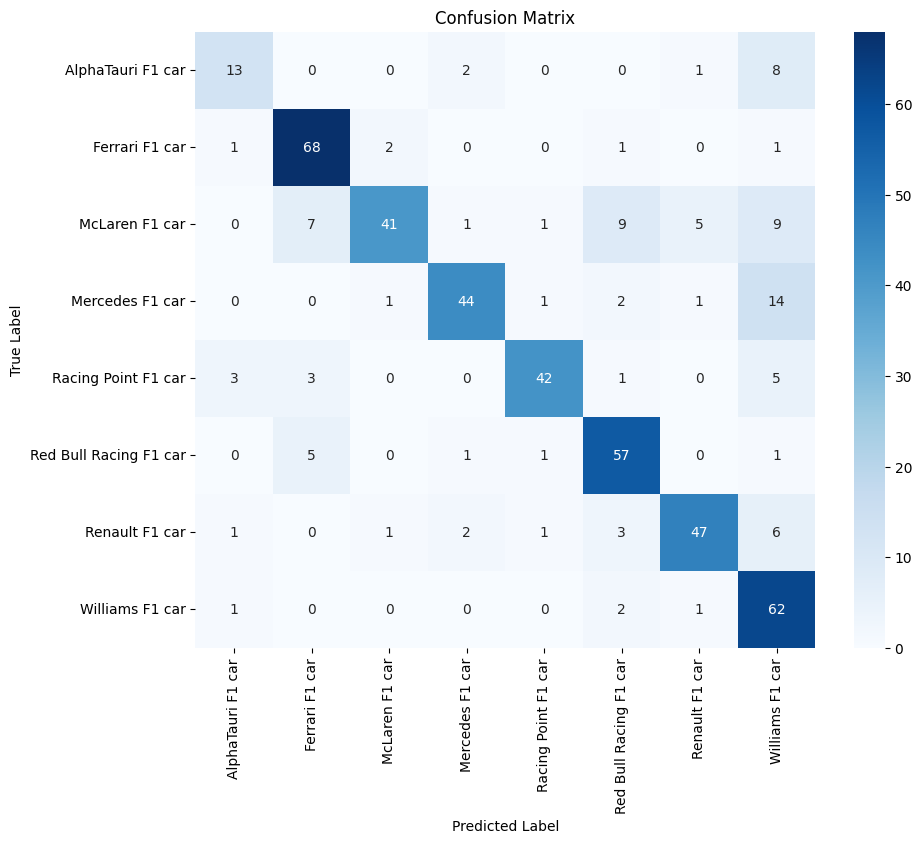

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
with open('/content/drive/MyDrive/F1CarsDataset/classification_report.txt', 'w') as f:
    f.write(classification_report(true_labels, pred_labels, target_names=class_names))


Day 05

In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
import numpy as np


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/drive/MyDrive/F1CarsDataset/Formula One Cars'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1928 images belonging to 8 classes.
Found 479 images belonging to 8 classes.


In [ ]:
num_classes = train_generator.num_classes
input_shape = (224, 224, 3)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 10
batch_size = train_generator.batch_size
num_training_samples = train_generator.samples

steps_per_epoch = np.ceil(num_training_samples / batch_size).astype(np.int32)
end_step = steps_per_epoch * epochs


In [ ]:
import numpy as np

# Assuming you have your train_generator and epochs set
batch_size = train_generator.batch_size               # e.g., 32
epochs = 10                                           # number of epochs to train
num_training_samples = train_generator.samples        # total training images

steps_per_epoch = np.ceil(num_training_samples / batch_size).astype(np.int32)
end_step = steps_per_epoch * epochs


In [ ]:
import tensorflow_model_optimization as tfmot

pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.0,
        final_sparsity=0.5,
        begin_step=0,
        end_step=end_step
    )
}


In [ ]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
